# Total SFRD for various integration limits

We have calculated the SFRD using low and low integration limits, for UV and IR. Now we want to combine them to find the total SFRD. To do this, we shall use the best-fitted function found using the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as con
import astropy.units as u
from scipy.optimize import minimize as mz
from scipy.optimize import curve_fit as cft
import utils as utl
import os

In [2]:
# Limits of integration
lims = np.array([r'$0.35 \ M_\odot \ year^{-1}$', r'$0.1 \ M_\odot \ year^{-1}$', r'$0.01 \ M_\odot \ year^{-1}$', r'$0.001 \ M_\odot \ year^{-1}$', r'$0.0001 \ M_\odot \ year^{-1}$'])#, r'$0.00001 \ M_\odot \ year^{-1}$'])

# Colors
cols = ['black', 'orangered', 'yellowgreen', 'cyan', 'cornflowerblue']

# Best fitted function parameters for both UV and IR
best_fitted_params_IR = [[0.01247074, 3.63054718, 2.40106822, 5.91636745],\
    [0.01313758, 3.57016286, 2.41114446, 5.88759236],\
    [0.0135848,  3.54674192, 2.40265707, 5.84706811],\
    [0.01049808, 4.64888261, 1.93398557, 6.05485269],\
    [0.0113317,  4.37322777, 1.98319543, 5.82384781]]

best_fitted_params_UV = [[3.40799290e-03, 1.79077295e+00, 4.80804980e+00, 5.66797307e+00],\
    [4.01782111e-03, 2.17886954e+00, 3.68349781e+00, 4.32689444e+00],\
    [3.71400060e-03, 3.09719460e+00, 2.50478383e+00, 4.05583056e+00],\
    [3.62188024e-03, 3.52180457e+00, 2.16351836e+00, 4.08903580e+00],\
    [3.65188271e-03, 3.59280782e+00, 2.11770941e+00, 4.11735771e+00]]

# Best fitted function
def psi_new(z, aa, bb, cc, dd):
    ab = (1+z)**bb
    cd = ((1+z)/cc)**dd
    ef = aa*ab/(1+cd)
    return ef

# Range of redshifts
znew = np.linspace(0,9,1000)

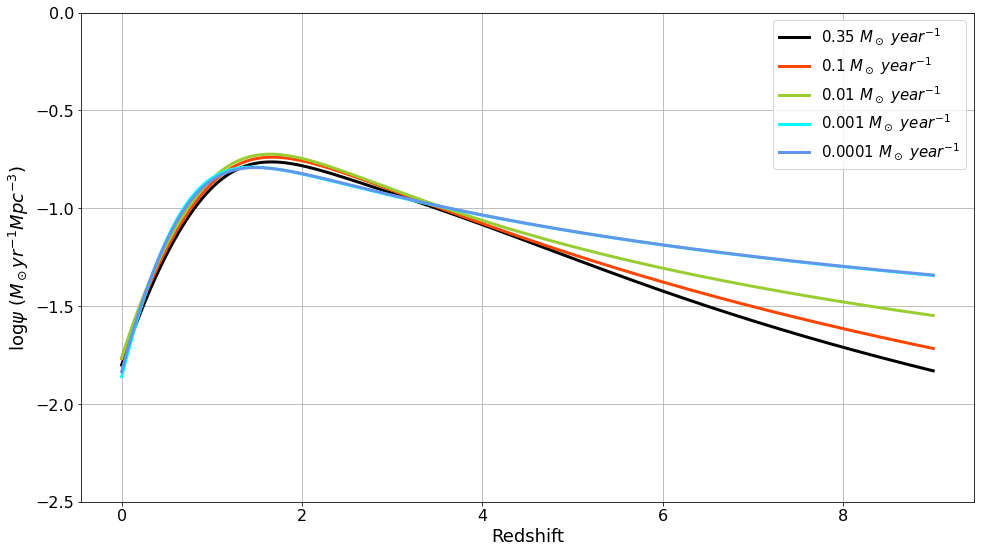

In [3]:
znew = np.linspace(0,9,1000)

plt.figure(figsize=(16,9))
for i in range(len(lims)):
    best_fit_funcIR = psi_new(znew, *best_fitted_params_IR[i])
    best_fit_funcUV = psi_new(znew, *best_fitted_params_UV[i])
    total_best_fit = best_fit_funcIR + best_fit_funcUV
    log_best_fit = np.log10(total_best_fit)
    plt.plot(znew, log_best_fit, label=lims[i], lw=3, c=cols[i])

plt.xlabel('Redshift', fontsize= 18)
plt.ylabel(r'$\log{\psi}$ ($M_\odot yr^{-1} Mpc^{-3}$)', fontsize= 18)
plt.ylim([-4.0, 1.5])
plt.grid()
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.ylim([-2.5, 0])
plt.legend(loc='upper right', fontsize= 15)#, bbox_to_anchor=(1.05, 1))